# HW3

<b>Instructions:</b> Write your answers in the empty code cells below.

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code does not work on different data</li>
<li>You use for loops (unless explicitly permitted)</li>
</ul>

## Problem

Start by executing the following code, which creates a Series object <b>stock</b> of share prices of Nvidia. 

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('NVDA.csv',index_col=0)
data.index=data.index.astype(np.datetime64)
stock = data['Close']

/Users/KI/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:308: FutureWarning: Passing in 'datetime64' dtype with no precision is deprecated
and will raise in a future version. Please pass in
'datetime64[ns]' instead.
  dtype=dtype, **kwargs)


In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Populating the interactive namespace from numpy and matplotlib


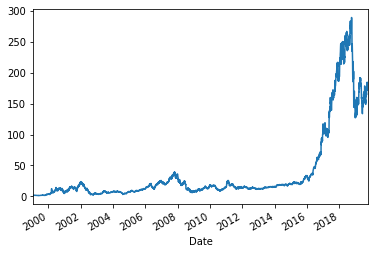

In [3]:
%pylab inline
stock.plot()

In [4]:
stock.head()
stock.tail()

Date
1999-01-22    1.640625
1999-01-25    1.812500
1999-01-26    1.671875
1999-01-27    1.666667
1999-01-28    1.661458
Name: Close, dtype: float64

Date
2019-10-01    174.000000
2019-10-02    173.039993
2019-10-03    181.309998
2019-10-04    181.970001
2019-10-07    184.330002
Name: Close, dtype: float64

Use the Series <i>stock</i> to answer the following questions.

## Question 1

### Q1.1, When is the first date this sotck close at more than 130 dollars? (pick the closest date in Camino)

In [5]:
stock[stock > 130].head(10)

Date
2017-05-15    134.309998
2017-05-16    136.809998
2017-05-18    133.070007
2017-05-19    136.000000
2017-05-22    138.899994
2017-05-23    137.029999
2017-05-24    138.570007
2017-05-25    138.259995
2017-05-26    141.839996
2017-05-30    144.869995
Name: Close, dtype: float64

**2017-05-15** is the first date where the stock is at more than 130 dollars.

### Q1.2, After stock price hit 130 dollar, how many trading days it took to reach the historical high? (pick the closest number of days in Camino)

In [6]:
stock[stock >= 130].head()

Date
2017-05-15    134.309998
2017-05-16    136.809998
2017-05-18    133.070007
2017-05-19    136.000000
2017-05-22    138.899994
Name: Close, dtype: float64

In [7]:
stock[stock == stock.max()]  #The date the historical high occurs

Date
2018-10-01    289.359985
Name: Close, dtype: float64

In [8]:
newrange = stock["2017-05-15":"2018-10-01"]  #contains stock values for this range of dates, from 130 to highest value

In [9]:
newrange.head() #Looks good

Date
2017-05-15    134.309998
2017-05-16    136.809998
2017-05-17    127.720001
2017-05-18    133.070007
2017-05-19    136.000000
Name: Close, dtype: float64

In [10]:
newrange.count() #This is the number of TRADING DAYS it took to reach that high

349

### Question 2

### Find the top 5 largest one-day % gain (in % compared to the closing cost of the previous trading day). Make sure that your output is a Series object that shows both date and the % drop. (pick the date closest to the day with the largest gain ratio in Camino)

In [11]:
stock.shift(1).head(10) #This shifted all prices forward one day

Date
1999-01-22         NaN
1999-01-25    1.640625
1999-01-26    1.812500
1999-01-27    1.671875
1999-01-28    1.666667
1999-01-29    1.661458
1999-02-01    1.583333
1999-02-02    1.614583
1999-02-03    1.489583
1999-02-04    1.520833
Name: Close, dtype: float64

In [12]:
stock.head(10)

Date
1999-01-22    1.640625
1999-01-25    1.812500
1999-01-26    1.671875
1999-01-27    1.666667
1999-01-28    1.661458
1999-01-29    1.583333
1999-02-01    1.614583
1999-02-02    1.489583
1999-02-03    1.520833
1999-02-04    1.604167
Name: Close, dtype: float64

In [13]:
diff = stock-stock.shift(1)

In [14]:
denom = (stock+stock.shift(1))/2  #two parts to percent difference formula

In [15]:
(diff/denom * 100).head(9)  #appears to work well

Date
1999-01-22         NaN
1999-01-25    9.954751
1999-01-26   -8.071749
1999-01-27   -0.311992
1999-01-28   -0.313029
1999-01-29   -4.815410
1999-02-01    1.954398
1999-02-02   -8.053693
1999-02-03    2.076125
Name: Close, dtype: float64

In [16]:
(diff/denom * 100).nlargest()  #These are the top five largest one day gains
                               #One day earlier is actual date, since this is percent change from previous trading day 

Date
2000-03-07    34.993385
2003-05-09    28.372964
2001-01-03    26.606336
2016-11-11    25.940676
2000-03-13    23.386346
Name: Close, dtype: float64

In [17]:
type((diff/denom * 100).nlargest() )  #Returns a series type

pandas.core.series.Series

## Question 3

###  With following investment strategy: buy on day 1, sell on day 3. If based on this strategy, what's the most dollars amount you can lose in one trading?  Also report the buying and selling date for that particular trade. ( pick the closest dollar amount it dropped in Camino)

In [18]:
stock.head(8)

Date
1999-01-22    1.640625
1999-01-25    1.812500
1999-01-26    1.671875
1999-01-27    1.666667
1999-01-28    1.661458
1999-01-29    1.583333
1999-02-01    1.614583
1999-02-02    1.489583
Name: Close, dtype: float64

In [19]:
stock.shift(2).head(8)

Date
1999-01-22         NaN
1999-01-25         NaN
1999-01-26    1.640625
1999-01-27    1.812500
1999-01-28    1.671875
1999-01-29    1.666667
1999-02-01    1.661458
1999-02-02    1.583333
Name: Close, dtype: float64

In [20]:
(stock - stock.shift(2)).head(8)  #net profit yield from this investment strategy. In dollars.

Date
1999-01-22         NaN
1999-01-25         NaN
1999-01-26    0.031250
1999-01-27   -0.145833
1999-01-28   -0.010417
1999-01-29   -0.083334
1999-02-01   -0.046875
1999-02-02   -0.093750
Name: Close, dtype: float64

In [21]:
(stock - stock.shift(2)).nsmallest(1)  #Here is the selling date with the most 
                                       #dollar amount lost from this trading strategy. Approx 57 dollars lost.

Date
2018-11-19   -57.690002
Name: Close, dtype: float64

In [22]:
stock.loc["2018-11-15"] - stock.loc["2018-11-19"]

57.69000199999999

The amount is an approximately 57 dollar loss. The sell date is 2018-11-19 as displayed above. The purchase date is 2018-11-15 as displayed above. (It appears to be a Thursday purchase and Monday sell transaction.)

## Question 4

### In which days did we observe that the price has increased of more than 60% within the 9 preceding trading sessions? Report your result as a Series (d,gain) where *d* is the trading session date when the increase was observed and *gain* is the maximum percentage gain (%) observed over the 9 days preceding session(today compare with previous 9 trading days).
#### *Hint:* use a **rolling** minimum . Today + 9 more days -> use rolling(10). (pick the closest date that has the highest gain ratio in Camino) 

In [23]:
rolls = stock.rolling(10)

In [24]:
type(rolls)

pandas.core.window.Rolling

In [25]:
rolls.min().head(20) #appears to work in making the smallest of the past 9 appear

Date
1999-01-22         NaN
1999-01-25         NaN
1999-01-26         NaN
1999-01-27         NaN
1999-01-28         NaN
1999-01-29         NaN
1999-02-01         NaN
1999-02-02         NaN
1999-02-03         NaN
1999-02-04    1.489583
1999-02-05    1.489583
1999-02-08    1.489583
1999-02-09    1.489583
1999-02-10    1.489583
1999-02-11    1.489583
1999-02-12    1.489583
1999-02-16    1.489583
1999-02-17    1.515625
1999-02-18    1.515625
1999-02-19    1.515625
Name: Close, dtype: float64

In [26]:
nine = rolls.min()

In [27]:
diff1 = stock - nine

In [28]:
denom1 = (stock + nine)/2

In [29]:
percents = (diff1/denom1) * 100  #Again, our percent difference formula

In [30]:
percents[percents > 60]

Date
2000-03-10    68.277084
2000-03-13    88.144796
2000-03-14    62.104868
Name: Close, dtype: float64

These are the dates with the higher than 60% gain. Highest was on **2000-03-13**.

## Question 5

### What was the **worst** possible "buy&sell" operation? Find the two days x and y so that the % loss resulting from buying in x and selling in y (with y after x) is maximized. Your code should work for any data. 
#### *Hint:* Use method cummax() or method cummin(). *Cummax/Cummin* returns the maximum/minimum value encountered so far. Make sure to return the trading days x and y, as well as the % loss resulting from buying in x and selling in y.
#### (Fill in blank for the buying and selling dates in Camino with the format 'buying-date/selling-date' (for example, 2001-01-01/2010-12-31)

In [31]:
stock.head(20)

Date
1999-01-22    1.640625
1999-01-25    1.812500
1999-01-26    1.671875
1999-01-27    1.666667
1999-01-28    1.661458
1999-01-29    1.583333
1999-02-01    1.614583
1999-02-02    1.489583
1999-02-03    1.520833
1999-02-04    1.604167
1999-02-05    1.651042
1999-02-08    1.593750
1999-02-09    1.531250
1999-02-10    1.515625
1999-02-11    1.645833
1999-02-12    1.739583
1999-02-16    1.750000
1999-02-17    1.656250
1999-02-18    1.682292
1999-02-19    1.739583
Name: Close, dtype: float64

In [32]:
stock.cummax().head(20) #appears to work

Date
1999-01-22    1.640625
1999-01-25    1.812500
1999-01-26    1.812500
1999-01-27    1.812500
1999-01-28    1.812500
1999-01-29    1.812500
1999-02-01    1.812500
1999-02-02    1.812500
1999-02-03    1.812500
1999-02-04    1.812500
1999-02-05    1.812500
1999-02-08    1.812500
1999-02-09    1.812500
1999-02-10    1.812500
1999-02-11    1.812500
1999-02-12    1.812500
1999-02-16    1.812500
1999-02-17    1.812500
1999-02-18    1.812500
1999-02-19    1.812500
Name: Close, dtype: float64

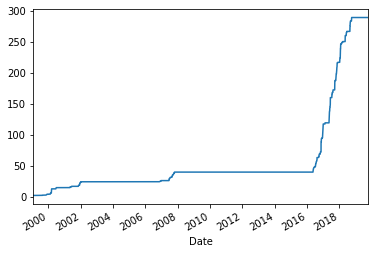

In [33]:
stock.cummax().plot() #gives an idea that cummax increases since the highest value to have appeared increases

In [34]:
(((stock.cummax() - stock)/stock.cummax()) * 100).head(10)

Date
1999-01-22     0.000000
1999-01-25     0.000000
1999-01-26     7.758621
1999-01-27     8.045959
1999-01-28     8.333352
1999-01-29    12.643697
1999-02-01    10.919559
1999-02-02    17.816110
1999-02-03    16.091972
1999-02-04    11.494234
Name: Close, dtype: float64

In [35]:
(((stock.cummax() - stock)/stock.cummax()) * 100).nlargest(1)  #This is our sell date

Date
2002-10-09    89.722492
Name: Close, dtype: float64

In [36]:
(((stock.cummax() - stock)/stock.cummax()) * 100).nlargest(1).index[0]

Timestamp('2002-10-09 00:00:00')

In [37]:
sell = (((stock.cummax() - stock)/stock.cummax()) * 100).nlargest(1).index[0]

**Now let's find the buy date.**

In [38]:
stock[stock.head(1).index[0]:sell].nlargest(1)

Date
2002-01-03    23.903334
Name: Close, dtype: float64

Buy date is **2002-01-03** and sell date is **2002-10-09**.